# 시간을 다루는 방법

## Python을 사용하는 방법

In [1]:
from datetime import datetime

In [2]:
my_year = 2023
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [3]:
my_date = datetime(my_year, my_month, my_day)
my_date

datetime.datetime(2023, 1, 2, 0, 0)

In [4]:
my_date_time = datetime(my_year, my_month, my_day, my_hour, my_minute, my_second)
my_date_time

datetime.datetime(2023, 1, 2, 13, 30, 15)

In [5]:
my_date_time.year, my_date_time.day, my_date_time.hour, my_date_time.minute

(2023, 2, 13, 30)

## Numpy를 사용하는 방법

In [6]:
import numpy as np

In [7]:
np.array(['2021-02-01', '2021-02-02', '2021-02-03'])

array(['2021-02-01', '2021-02-02', '2021-02-03'], dtype='<U10')

In [8]:
np.array(['2021-02-01', '2021-02-02', '2021-02-03'], dtype='datetime64')

array(['2021-02-01', '2021-02-02', '2021-02-03'], dtype='datetime64[D]')

In [9]:
np.array(['2021-02-01', '2021-02-02', '2021-02-03'], dtype='datetime64[M]')

array(['2021-02', '2021-02', '2021-02'], dtype='datetime64[M]')

In [10]:
np.arange('2021-02', '2021-03',5, dtype='datetime64[D]')

array(['2021-02-01', '2021-02-06', '2021-02-11', '2021-02-16',
       '2021-02-21', '2021-02-26'], dtype='datetime64[D]')

## Pandas를 사용하는 방법

In [11]:
import pandas as pd

In [12]:
pd.date_range('2021-01-01', '2021-01-10', freq='D')

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10'],
              dtype='datetime64[ns]', freq='D')

In [13]:
pd.to_datetime(['1/2/2018', 'Jan 03, 2018', '01/03/2018'], format='mixed')

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-03'], dtype='datetime64[ns]', freq=None)

In [14]:
data = np.random.randn(3,2)
cols = ['A', 'B']
data, cols

(array([[-0.23406896, -0.13535415],
        [ 0.51849088, -2.16105104],
        [ 0.5889415 , -0.25044524]]),
 ['A', 'B'])

In [15]:
idx = pd.date_range('2021-01-01', periods=3, freq='D')
df = pd.DataFrame(data, index=idx, columns=cols)
df

,A,B
2021-01-01,-0.234069,-0.135354
2021-01-02,0.518491,-2.161051
2021-01-03,0.588941,-0.250445


In [16]:
df.index, df.index.max(), df.index.argmax()

(DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03'], dtype='datetime64[ns]', freq='D'),
 Timestamp('2021-01-03 00:00:00'),
 2)

## Pandas를 사용한 Datetime 활용
`리샘플링(resample)`은 `Datetime Index`를 원하는 주기로 나누어주는 메서드 입니다. `asfreq`와 유사 하지만 더 많은 기능과 설정을 할 수 있으며, 리샘플링으로 생성된 행의 값 또한 여러 방식으로 생성할 수 있습니다.

### `Resample`

In [17]:
df = pd.read_csv('../data/starbucks.csv', index_col='Date', parse_dates=True)
df

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548
...,...,...
2018-12-24,60.5600,6323252
2018-12-26,63.0800,16646238
2018-12-27,63.2000,11308081


In [18]:
df.resample(rule='A').std()

,Close,Volume
Date,,
2015-12-31,6.076922,4.093368e+06
2016-12-31,1.958114,3.936798e+06
2017-12-31,2.415526,4.690972e+06
2018-12-31,4.678178,6.465358e+06


In [19]:
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

In [20]:
def first_day(entry):
    if len(entry):
        return entry[0]

In [21]:
df.resample(rule='A').apply(first_day)

,Close,Volume
Date,,
2015-12-31,38.0061,6906098
2016-12-31,55.0780,13521544
2017-12-31,53.1100,7809307
2018-12-31,56.3243,7215978


<Axes: xlabel='Date'>

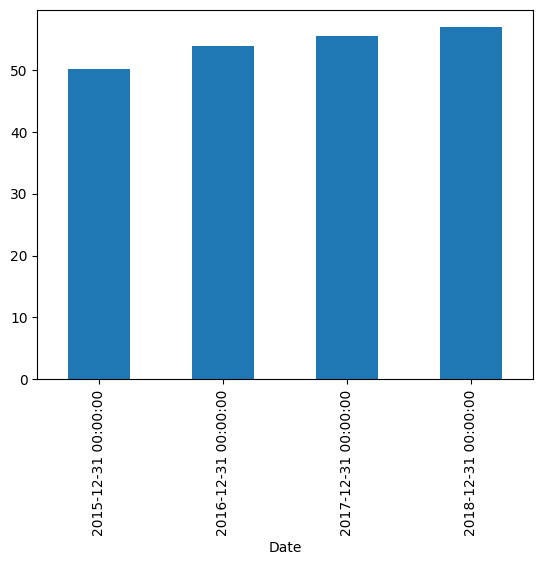

In [22]:
df['Close'].resample('A').mean().plot.bar()

<Axes: xlabel='Date'>

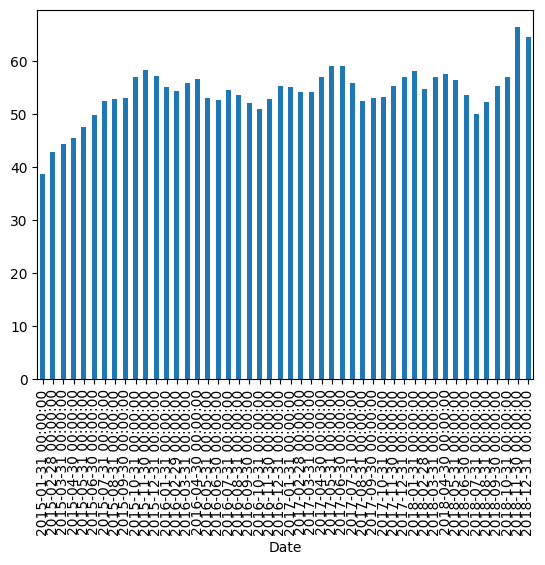

In [23]:
df['Close'].resample('M').mean().plot.bar()

### `Rolling`과 `Expanding`

In [26]:
df.head()

,Close,Volume
Date,,
2015-01-02,38.0061,6906098
2015-01-05,37.2781,11623796
2015-01-06,36.9748,7664340
2015-01-07,37.8848,9732554
2015-01-08,38.4961,13170548


<Axes: xlabel='Date'>

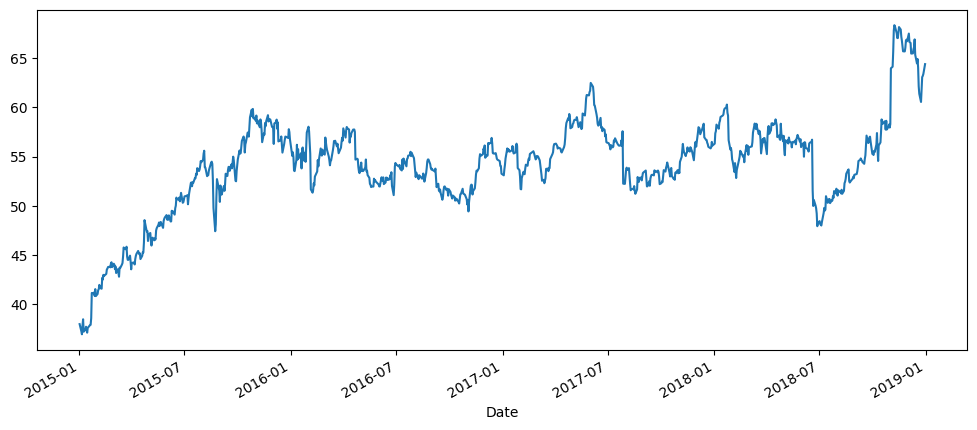

In [28]:
df['Close'].plot(figsize=(12,5))

<Axes: xlabel='Date'>

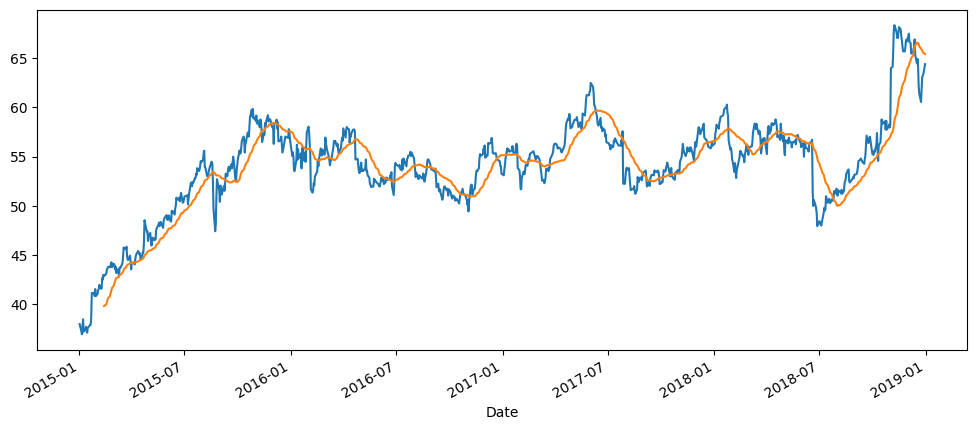

In [31]:
df['Close'].plot(figsize=(12,5))
df.rolling(window=30).mean()['Close'].plot()

In [33]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df.head()

,Close,Volume,Close: 30 Day Mean
Date,,,
2015-01-02,38.0061,6906098,NaN
2015-01-05,37.2781,11623796,NaN
2015-01-06,36.9748,7664340,NaN
2015-01-07,37.8848,9732554,NaN
2015-01-08,38.4961,13170548,NaN


<Axes: xlabel='Date'>

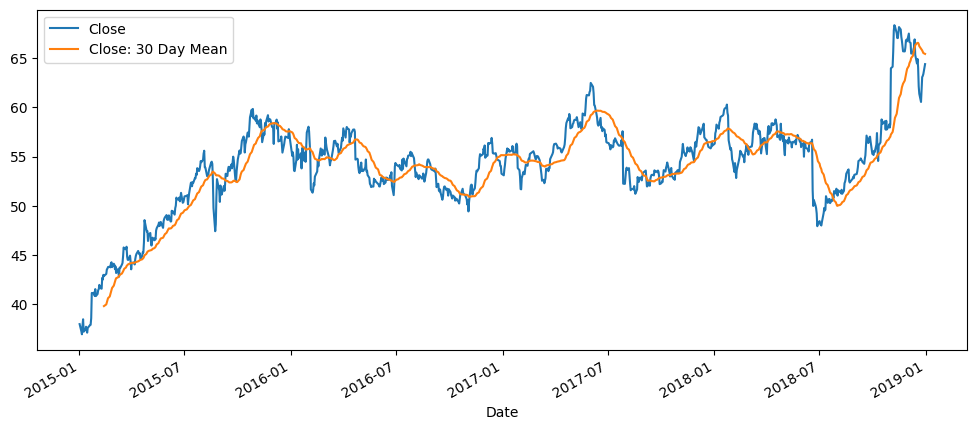

In [34]:
df[['Close', 'Close: 30 Day Mean']].plot(figsize=(12,5))

<Axes: xlabel='Date'>

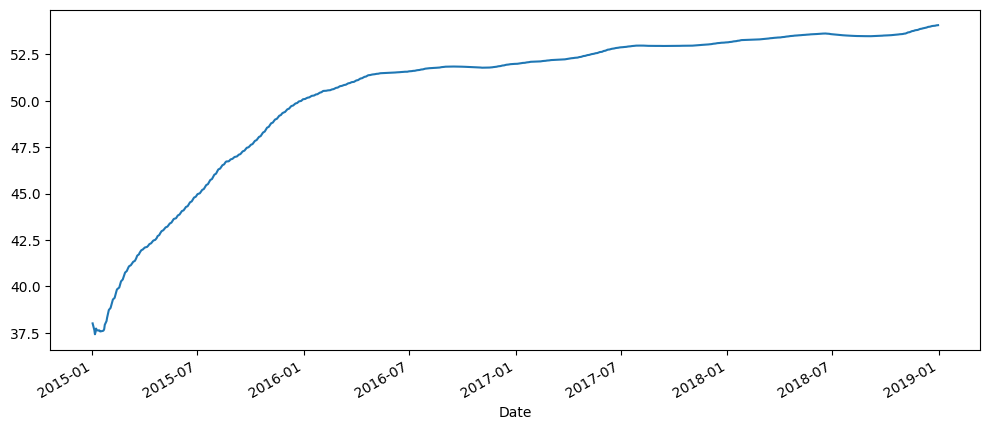

In [35]:
df['Close'].expanding(min_periods=1).mean().plot(figsize=(12,5))

# 시계열을 시각화 하는 방법

<Axes: xlabel='Date'>

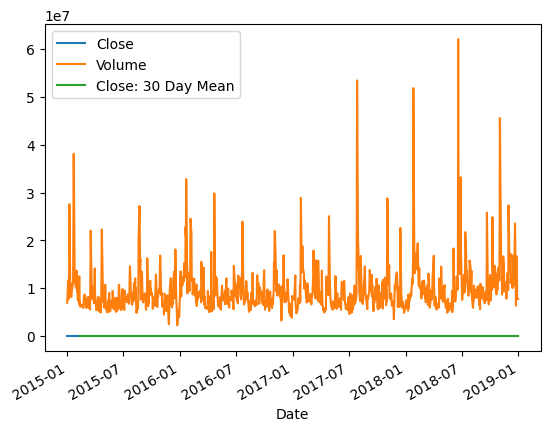

In [37]:
df.plot()

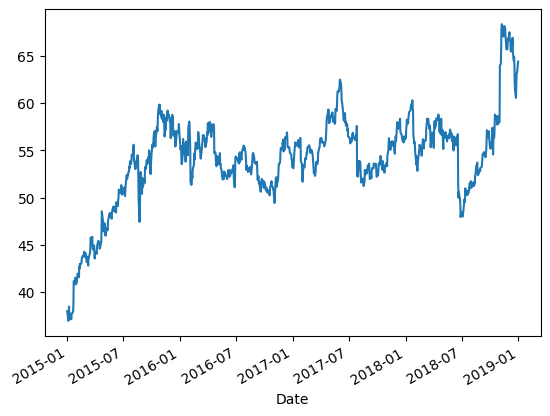

In [39]:
df['Close'].plot();

<Axes: xlabel='Date'>

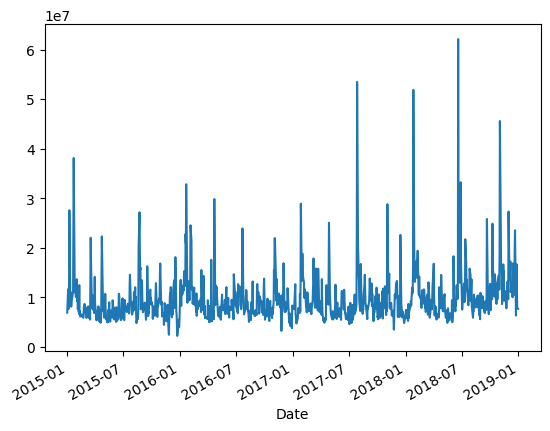

In [40]:
df['Volume'].plot()

In [41]:
title = 'Title'
xlabel = 'X Label'
ylabel = 'Y Label'

<Axes: title={'center': 'Title'}, xlabel='X Label', ylabel='Y Label'>

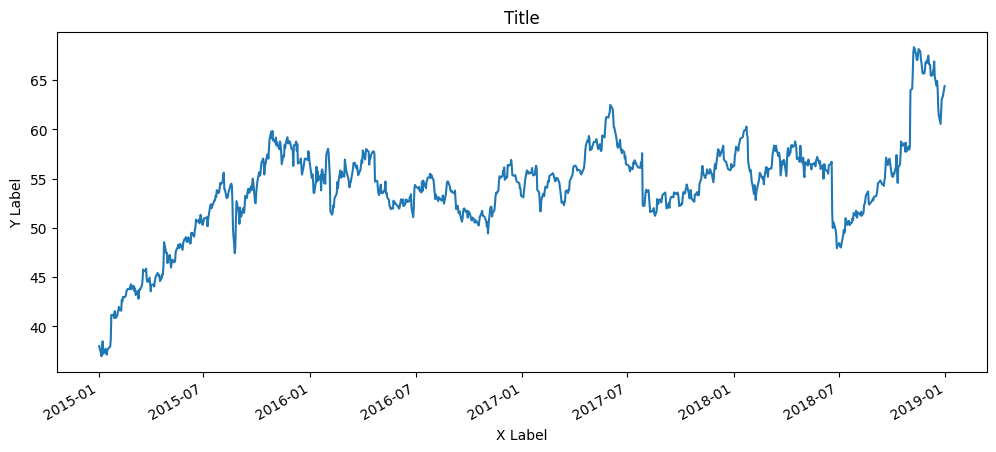

In [43]:
df['Close'].plot(figsize=(12,5), title=title, xlabel=xlabel, ylabel=ylabel)

<Axes: title={'center': 'Title'}, xlabel='Date'>

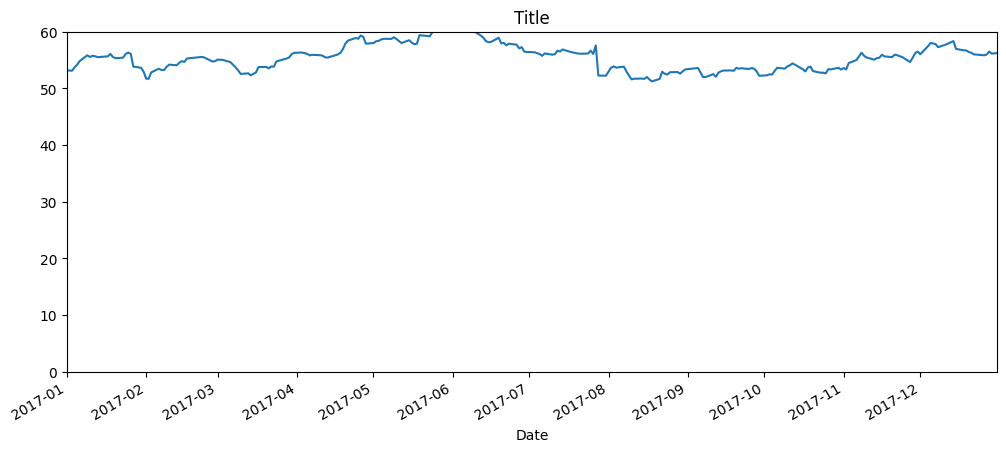

In [50]:
df['Close'].plot(figsize=(12,5), title=title, xlim=['2017-01-01','2017-12-31'], ylim=[0,60])

<Axes: title={'center': 'Title'}, xlabel='X Label', ylabel='Y Label'>

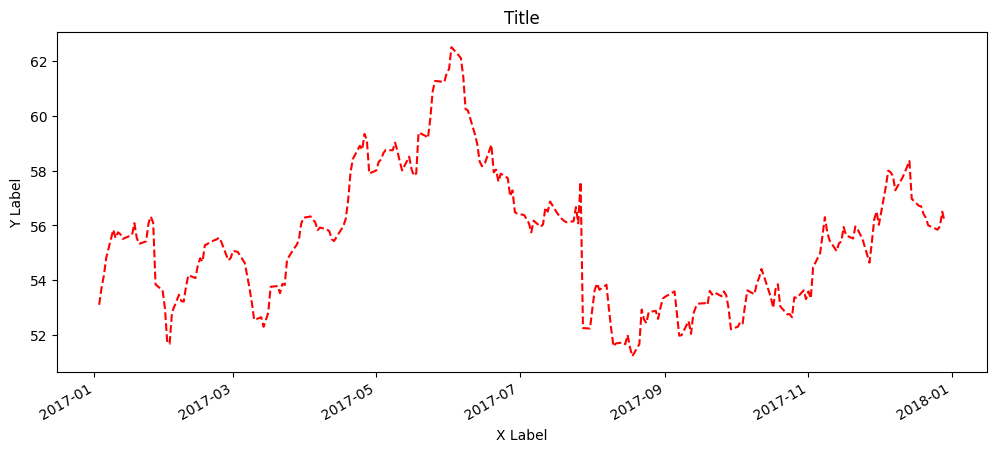

In [52]:
df['Close']['2017-01-01':'2017-12-31'].plot(figsize=(12,5), title=title, xlabel=xlabel, ylabel=ylabel, ls='--', c='red')

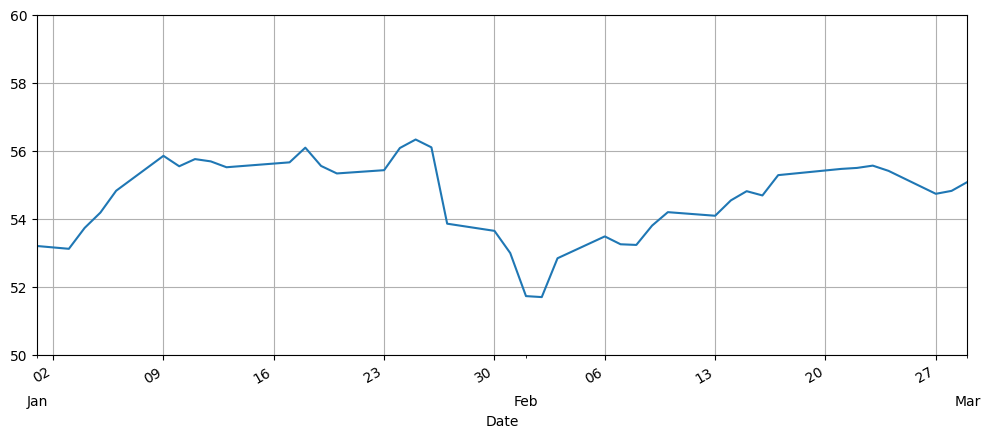

In [68]:
from matplotlib import dates
ax = df['Close'].plot(figsize=(12,5), xlim=['2017-01-01', '2017-03-01'], ylim=[50,60])
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

# 시계열 연습 #1

In [69]:
import pandas as pd

df = pd.read_csv('../Data/monthly_milk_production.csv', encoding='utf8')
title = "Monthly milk production: pounds per cow. Jan '62 - Dec '75"

print(len(df))
print(df.head())

168
      Date  Production
0  1962-01         589
1  1962-02         561
2  1962-03         640
3  1962-04         656
4  1962-05         727


In [70]:
df.dtypes

Date          object
Production     int64
dtype: object

In [71]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date          datetime64[ns]
Production             int64
dtype: object

In [72]:
df.set_index('Date',inplace=True)
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


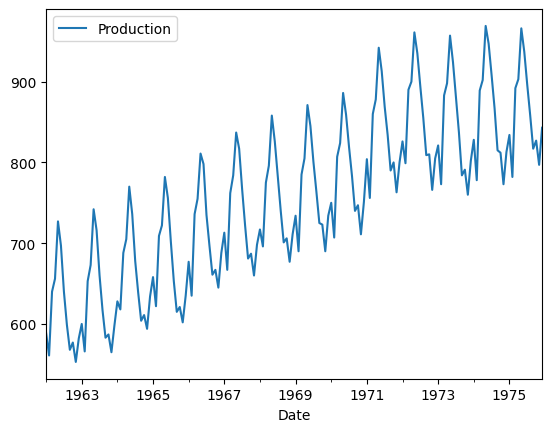

In [73]:
df.plot();


In [74]:
df['Month']=df.index.month
df.head()

,Production,Month
Date,,
1962-01-01,589,1
1962-02-01,561,2
1962-03-01,640,3
1962-04-01,656,4
1962-05-01,727,5


In [75]:
df['Month']=df.index.strftime('%B')
df.head()

,Production,Month
Date,,
1962-01-01,589,January
1962-02-01,561,February
1962-03-01,640,March
1962-04-01,656,April
1962-05-01,727,May


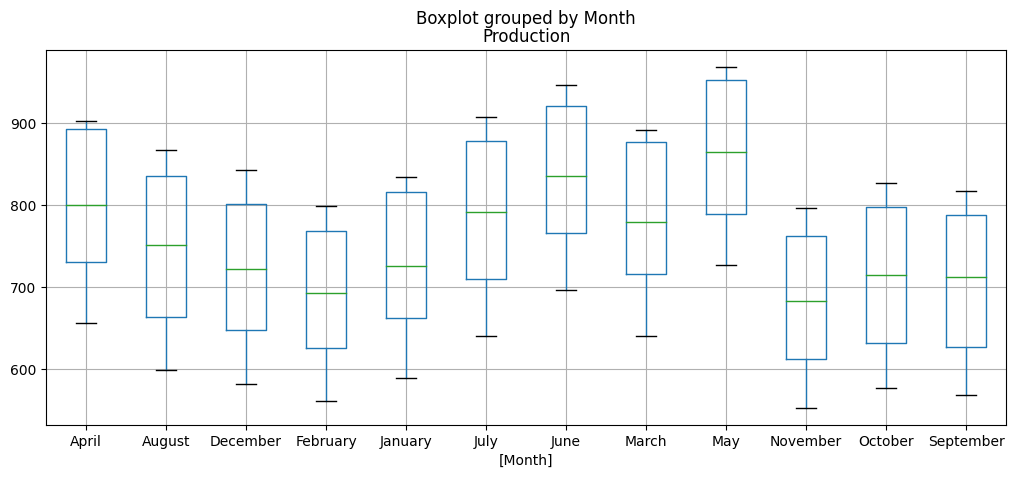

In [76]:
df.boxplot(by='Month',figsize=(12,5));

# 시계열 연습 #2

In [77]:
df = pd.read_csv('../Data/UMTMVS.csv')

In [78]:
df.head()

,DATE,UMTMVS
0,1992-01-01,209438.0
1,1992-02-01,232679.0
2,1992-03-01,249673.0
3,1992-04-01,239666.0
4,1992-05-01,243231.0


In [79]:
df = df.set_index('DATE')

In [80]:
df.index

Index(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01', '1992-05-01',
       '1992-06-01', '1992-07-01', '1992-08-01', '1992-09-01', '1992-10-01',
       ...
       '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
       '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
      dtype='object', name='DATE', length=325)

In [81]:
df.index = pd.to_datetime(df.index)

In [82]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', length=325, freq=None)

<Axes: xlabel='DATE'>

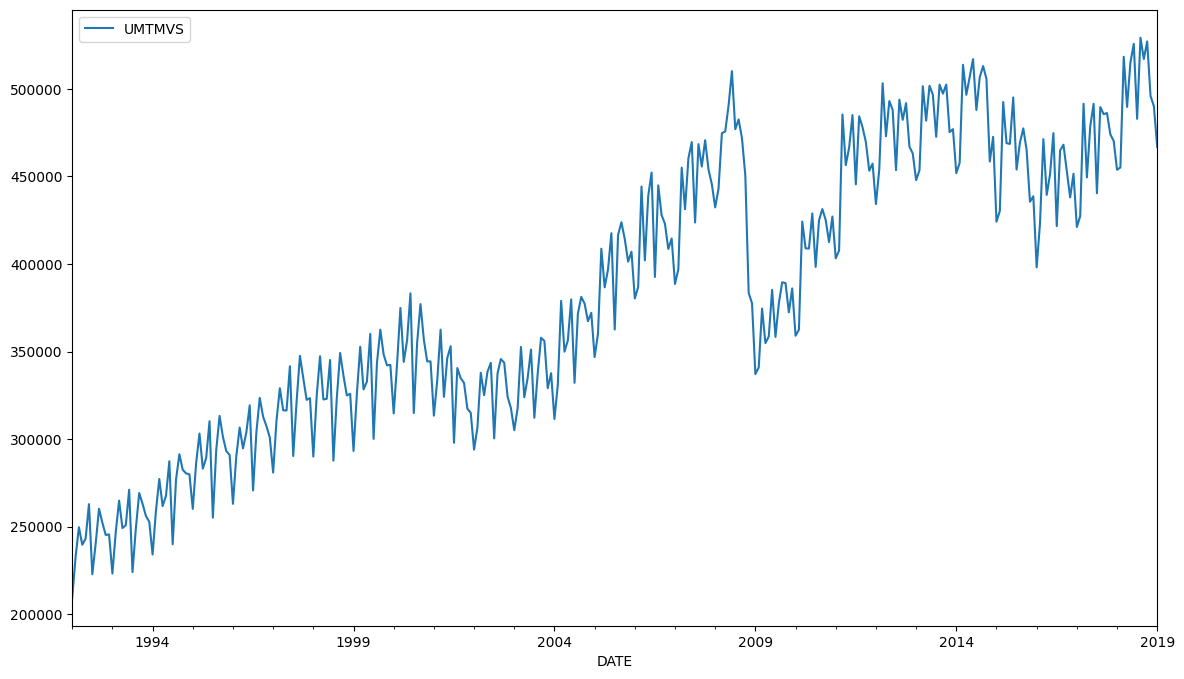

In [83]:
df.plot(figsize=(14,8))

In [84]:
100 * (df.loc['2019-01-01'] - df.loc['2009-01-01']) / df.loc['2009-01-01']

UMTMVS    38.472149
dtype: float64

In [85]:
100 * (df.loc['2009-01-01'] - df.loc['2008-01-01']) / df.loc['2008-01-01']

UMTMVS   -22.022775
dtype: float64

In [86]:
df.loc['2005-01-01':].idxmin()

UMTMVS   2009-01-01
dtype: datetime64[ns]

In [87]:
df.sort_values(by='UMTMVS',ascending=False).head(5)

,UMTMVS
DATE,
2018-08-01,529157.0
2018-10-01,527031.0
2018-06-01,525660.0
2018-03-01,518285.0
2018-09-01,516992.0


In [88]:
df.loc['2008-01-01'] - df.loc['2009-01-01']

UMTMVS    95206.0
dtype: float64

<Axes: xlabel='DATE'>

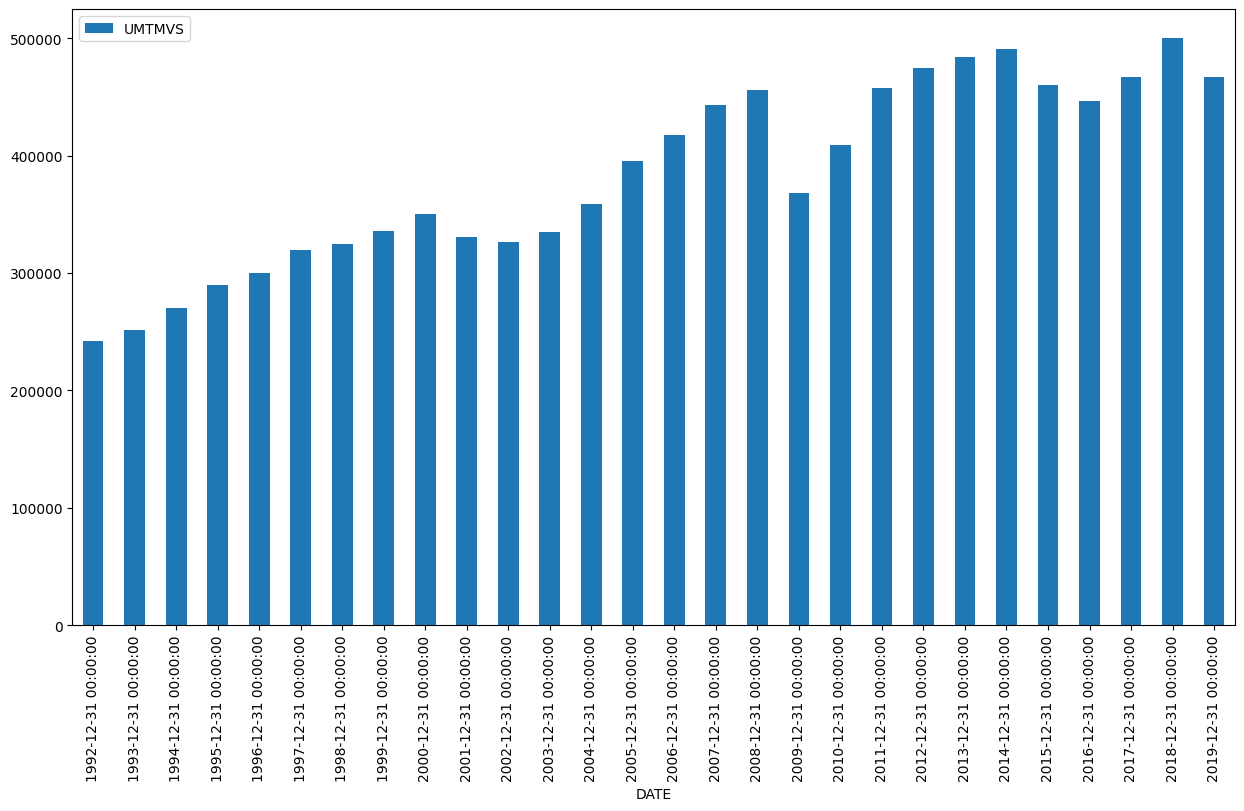

In [89]:
df.resample('Y').mean().plot.bar(figsize=(15,8))

In [91]:
yearly_data = df.resample('Y').mean()
yearly_data_shift = yearly_data.shift(1)
yearly_data.head()

,UMTMVS
DATE,
1992-12-31,242002.000000
1993-12-31,251708.083333
1994-12-31,269842.666667
1995-12-31,289973.083333
1996-12-31,299765.666667


In [92]:
change = yearly_data - yearly_data_shift 

In [93]:
change['UMTMVS'].idxmax()

Timestamp('2011-12-31 00:00:00')

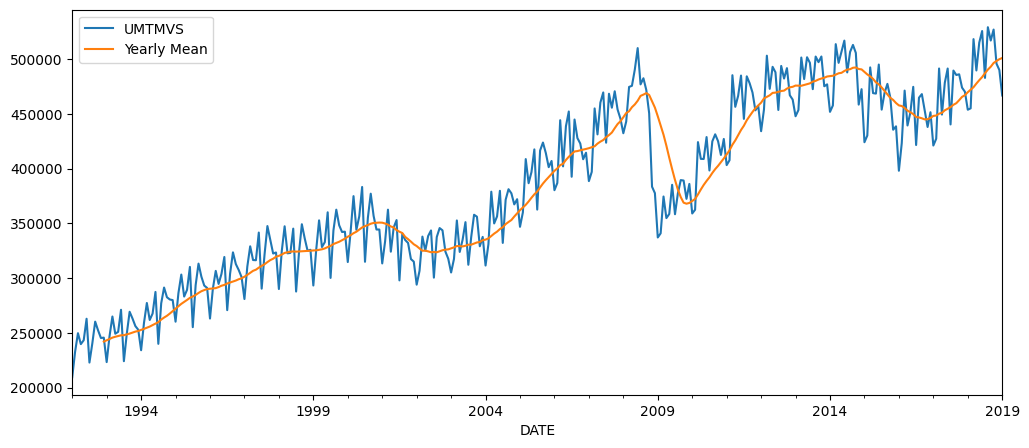

In [94]:
df['Yearly Mean'] = df['UMTMVS'].rolling(window=12).mean()
df[['UMTMVS','Yearly Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

In [95]:
df = pd.read_csv('../Data/UMTMVS.csv',index_col='DATE',parse_dates=True)

In [96]:
df2008 = df.loc['2008-01-01':'2009-01-01']

In [97]:
df2008.idxmax()

UMTMVS   2008-06-01
dtype: datetime64[ns]

In [98]:
df2008.max()

UMTMVS    510081.0
dtype: float64

In [99]:
df_post_peak = df.loc['2008-06-01':]

In [100]:
df_post_peak[df_post_peak>=510081].dropna()

,UMTMVS
DATE,
2008-06-01,510081.0
2014-03-01,513700.0
2014-06-01,516935.0
2014-09-01,512988.0
2018-03-01,518285.0
2018-05-01,515105.0
2018-06-01,525660.0
2018-08-01,529157.0
2018-09-01,516992.0


In [101]:
len(df.loc['2008-06-01':'2014-03-01'])

70